In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime
%matplotlib inline
plt.rcParams['font.family'] = ['SimHei'] #  set font for chinese in matplotlib figure

In [2]:
df_policy_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/policy_0702.csv')
df_claim_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/claim_0702.csv')
df_training_raw = pd.read_csv('../Tbrain_Insurance/training-set.csv')
df_testing_raw = pd.read_csv('../Tbrain_Insurance/testing-set.csv')
df_policy = df_policy_raw 
df_claim = df_claim_raw 
df_training = df_training_raw
df_testing = df_testing_raw
pd.set_option('display.max_columns', None)

# Policy File
shape  (1747942, 41)

In [ ]:
df_policy.shape

In [ ]:
# Policy_Number	保單號碼 
# Insured's_ID	被保險人代號(替代值) 
# Prior_Policy_Number	前保單號     almost == Cancellation =='Y'
# Cancellation	非繼承自前保單        almost match "Prior_policy Number, only #12 w/o cancellation
# Vehicle_identifier	車牌號碼 
# Vehicle_Make_and_Model1	廠牌名稱一 
# Vehicle_Make_and_Model2	廠牌名稱二
# Manafactured_Year_and_Month	製造年份 
# Engine_Displacement_(Cubic_Centimeter)	排氣量 
# Imported_or_Domestic_Car	車系代號
# Coding_of_Vehicle_Branding_&_Type	廠牌車型代號
# qpt	乘載數量 
# fpt	乘載單位 
# Main_Insurance_Coverage_Group	險種分類 
# Insurance_Coverage	險種代碼
# Insured_Amount1	保額一 
# Insured_Amount2	保額二 
# Insured_Amount3	保額三
# Coverage_Deductible_if_applied	自負額 
# Premium	簽單保費 
# Replacement_cost_of_insured_vehicle	重置成本
# Distribution_Channel	主通路代號 
# Multiple_Products_with_TmNewa_(Yes_or_No?)	同一車主前一年度非車險保單件數
# lia_class	車責本期級數 
# plia_acc	車責賠款係數 
# pdmg_acc	車體賠款係數 
# fassured	被保險人性質
# ibirth	出生日期 
# fsex	性別 
# fmarriage	婚姻狀況 
# aassured_zip	郵遞區號
# iply_area	承保地區代號(分公司) 
# dbirth	要保人出生日期 
# fequipment1	配備-音響註記 
# fequipment2	配備-車箱註記 
# fequipment3	配備-冷凍機組註記 
# fequipment4	配備-車框、車斗註記 
# fequipment5	配備-昇降系統註記 
# fequipment6	配備-電動車電池註記
# fequipment9	配備-其他 
# nequipment9	配備-其他說明

# Policy NAN column

In [ ]:
# Prior_Policy_Number    328557
# Vehicle_identifier           513
# ibirth                              317765  (275,820 法人 + 41,945 nan) 合理判斷 fsex = nan -> 法人
# fsex                               41945    -> fill ' '
# fmarriage                          41945    -> fill ' '
# dbirth                            258932
nan_count = df_policy.isnull().sum()
nan_count[nan_count > 0]/df_policy.shape[0]     

In [ ]:
cond1 = df_policy['fsex']==' '
cond2 = df_policy['ibirth'].notnull()
cond = cond1 & cond2 
df_policy[cond].shape[0]   
# 1:男 
# 2:女 
# 空白:法人 (275,832)      275,820 比沒有ibirth, 有12筆有 ibirth
# 4. nan unknown (41,945) 都沒有ibirth
df_policy[cond]

# Policy_Number 保單號碼

In [ ]:
df_policy['Policy_Number'].nunique() # 351273 unique value

In [ ]:
df_policy['Policy_Number'].value_counts().value_counts().sort_index().plot(kind='bar') # 保單號碼count 分佈

# Insured's_ID 被保險人代號(替代值)

In [ ]:
insured_ID_count = df_policy['Insured\'s_ID'].value_counts() #.value_counts()
# insured_ID_count[insured_ID_count > 18].plot(kind='bar')
print(insured_ID_count.describe()) # Insured's_ID
insured_ID_count.head(10)

In [ ]:
insured_ID_count.value_counts()[insured_ID_count.value_counts() > 50].sort_index().plot(kind='bar') # insured_ID_count 次數分佈

# Prior_Policy_Number 前保單號

In [ ]:
# is null: not null =  328557 : 1419385
df_policy['Prior_Policy_Number'].isnull().value_counts()

In [ ]:
df_policy['Prior_Policy_Number'].value_counts().describe()

In [ ]:
df_policy['Prior_Policy_Number'].value_counts().value_counts().sort_index().plot(kind='bar')

# Cancellation 非繼承自前保單
Ｙ：是 空白：否

In [ ]:
df_policy['Cancellation'].value_counts().plot(kind='bar')

In [ ]:
df_policy['lia_class'].value_counts().plot(kind='bar')

In [ ]:
cond1 = df_policy['Cancellation']=='Y'
cond2 = df_policy['Cancellation']==' '

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
df_policy[cond1]['lia_class'].value_counts().sort_index().plot(kind='bar')
plt.subplot(1,2,2)
df_policy[cond2]['lia_class'].value_counts().sort_index().plot(kind='bar')

# Vehicle_identifier 車牌號碼

In [ ]:
df_policy['Vehicle_identifier'].value_counts()

In [ ]:
df_policy[df_policy['Vehicle_identifier'] == 'd6889b6bc4c1ebacf94fef34aec655ab35186d80']

In [ ]:
df_policy['Vehicle_identifier'].value_counts().value_counts().sort_index().plot(kind='bar') # Vehicle_identifier count distribution

# Vehicle_Make_and_Model1, Vehicle_Make_and_Model2 廠牌名稱

In [ ]:
# df_policy['Vehicle_Make_and_Model1'].value_counts() # length: 136
# df_policy['Vehicle_Make_and_Model2'].value_counts() # length: 8112

In [ ]:
df_policy['Vehicle_Make_and_Model1'].value_counts().plot(kind='bar')

In [ ]:
df_policy['Vehicle_Make_and_Model1'].value_counts().value_counts().sort_index().plot(kind='hist')

In [ ]:
df_policy['Vehicle_Make_and_Model2'].value_counts().describe()
# .value_counts().sort_index().plot(kind='bar')

In [ ]:
Vehicle_Make_and_Model2_count = df_policy['Vehicle_Make_and_Model2'].value_counts()
Vehicle_Make_and_Model2_count[Vehicle_Make_and_Model2_count > 100].plot(kind='bar')

# Manafactured_Year_and_Month 製造年份

In [ ]:
plt.figure(figsize=(20,1))
df_policy['Manafactured_Year_and_Month'].value_counts().sort_index().plot(kind='bar')

In [ ]:
# df_policy[df_policy['Manafactured_Year_and_Month'] < 1960]

# Engine_Displacement_(Cubic_Centimeter) 排氣量

In [ ]:
# 前50大排氣量
plt.figure(figsize=(20,2))
df_policy['Engine_Displacement_(Cubic_Centimeter)'].value_counts().head(50).sort_index().plot(kind='bar')

## Imported_or_Domestic_Car : 車系代號

In [ ]:
# 10	國產車 77%
# 20	美國車  1%
# 21	福特
# 22	通用
# 23	克萊斯勒
# 24	美規日車 1%
# 30	歐洲車 12.5%
# 40	日本車 7.7%
# 50	韓國車
# 90	其它

# counts
# df_car.groupby('Imported_or_Domestic_Car').count()
# 10    1346381
# 20      15375
# 21        858
# 22        207
# 23         29
# 24      14459
# 30     218102
# 40     134929
# 50      12249
# 90       5353

# car_types = sorted(df_policy['Imported_or_Domestic_Car'].unique()) # [10, 20, 21, 22, 23, 24, 30, 40, 50, 90]

# for b in sorted(set(df_policy['Imported_or_Domestic_Car'])):
#     print(b, "  ", df_policy[df_policy['Imported_or_Domestic_Car'] == b].shape[0] / df_policy.shape[0] * 100, "%")
# plt.bar(car_types, df_car['Imported_or_Domestic_Car'].value_counts().sort_index().values)
df_policy['Imported_or_Domestic_Car'].value_counts().sort_index().plot(kind='bar')

In [ ]:
#  Imported_or_Domestic_Car 十位數
df_car = df_policy[['Imported_or_Domestic_Car']].copy()
df_car['car_types'] = (df_car['Imported_or_Domestic_Car'] /10).apply(np.floor)
df_car['car_types'].value_counts().sort_index().values
plt.bar(sorted(df_car['car_types'].unique()), df_car['car_types'].value_counts().sort_index())

# Coding_of_Vehicle_Branding_&_Type 廠牌車型代號

In [ ]:
# count: 7405
car_types = df_policy['Coding_of_Vehicle_Branding_&_Type'].value_counts()
print(car_types.describe())
car_types[car_types > 1000].plot(kind='bar') # count: 409 car types

In [ ]:
# qpt 乘載數量

In [ ]:
print(df_policy['qpt'].value_counts().sort_index())
df_policy['qpt'].value_counts().sort_index().plot(kind='bar')

In [ ]:
df_qpt = df_policy['qpt'].value_counts().sort_index()
df_qpt[df_qpt.index > 10].sum()  # 2112

# fqt 乘載單位

In [ ]:
df_policy['fpt'].value_counts()

# Main_Insurance_Coverage_Group 險種分類

In [ ]:
df_policy['Main_Insurance_Coverage_Group'].value_counts().plot(kind='bar')
df_policy['Main_Insurance_Coverage_Group'].value_counts()

In [ ]:
Main_Insurance_Coverage_Group_value_counts = df_policy['Main_Insurance_Coverage_Group'].value_counts()
plt.bar(['車責', '車損', '竊盜'], df_policy['Main_Insurance_Coverage_Group'].value_counts().sort_values())
df1 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車責']
df2 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='竊盜']
df3 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車損']
## 'lia_class'車責本期級數   分級1-19 新戶從4開始 出險（+3) 沒有出險 (-1)  
## -1(55%) 0(7.6%) 要怎麼解釋？  

# ----->
# 解1: -1 0 都當作 1 解2: 當成調整項 +10% x lia_class

col = 'lia_class'
print('車責',df1[col].shape) #車責 (1253120,)
print('竊盜',df2[col].shape) #竊盜 (176809,)
print('車損',df3[col].shape) #車損 (318013,)
# 車責本期級數
print('車責', sorted(set(df1[col])))
print('竊盜', sorted(set(df2[col])))
print('車損', sorted(set(df3[col])))

In [ ]:
# 車責本期級數 in 險種分類
lia_classes = ['車責', '車損', '竊盜']
plt.figure(figsize=(10,5))
for index, lia_class in enumerate(lia_classes):
    lia_class_value_count = df_policy.loc[df_policy['Main_Insurance_Coverage_Group'] == lia_class, 'lia_class'].value_counts().sort_index()
    plt.subplot(1,3,index+1)
    plt.title(lia_class)
    plt.bar(np.arange(len(lia_class_value_count)), lia_class_value_count)
    
#     for x in sorted(set(df1[col])):
#         print(x, df1[df1['lia_class']== x].shape[0]/df1.shape[0]*100)  
'''
(%)
-1  54.632198033707866 
0   7.66486848825332 
1   9.491189989785495 
2   8.888294816138917
3   7.6516215526046985
4   8.230975485188969
5   1.2548678498467825
6   0.8911357252298264
7   0.6505362614913177
8   0.2353326098059244
9   0.16678370786516852
10  0.09847420837589378
11  0.04365104698672114
12  0.0400600102145046
13  0.022902834525025534
14  0.010852911133810011
15  0.009576098059244127
16  0.007581077630234934
17  0.001995020429009193
18  0.0040698416751787534
19  0.0030324310520939736
'''

# Insurance_Coverage 險種代碼

In [ ]:
# 險種代碼對應自負額
for c in sorted(set(df_policy['Insurance_Coverage'])):
    print(c," ", set(df_policy[df_policy['Insurance_Coverage'] == c]['Coverage_Deductible_if_applied']) )

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
df_policy[df_policy['Main_Insurance_Coverage_Group'] == '車責']['Insurance_Coverage'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
df_policy[df_policy['Main_Insurance_Coverage_Group'] == '車損']['Insurance_Coverage'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
df_policy[df_policy['Main_Insurance_Coverage_Group'] == '竊盜']['Insurance_Coverage'].value_counts().plot(kind='bar')

# Insured_Amount1 Insured_Amount2 Insured_Amount3 保額ㄧ 二 三

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
df_policy['Insured_Amount1'].value_counts().sort_index().plot(kind='bar')
plt.subplot(1,3,2)
df_policy['Insured_Amount2'].value_counts().sort_index().plot(kind='bar')
plt.subplot(1,3,3)
df_policy['Insured_Amount3'].value_counts().sort_index().plot(kind='bar')

In [ ]:
df_policy[['Insured_Amount1', 'Insured_Amount2', 'Insured_Amount3']].sample(20).plot.barh(stacked=True)

In [ ]:
df_policy[['Insured_Amount1', 'Insured_Amount2', 'Insured_Amount3']].hist(bins=20)

In [ ]:
df_policy['Insured_Amount1'].describe(), df_policy['Insured_Amount2'].describe(), df_policy['Insured_Amount3'].describe()

## Coverage_Deductible_if_applied (自負額) 類別參照:險種分類及自負額說明Sheet

In [ ]:
# Coverage_Deductible_if_applied(自負額) value counts

# 0   : 90.25%
# 10  : 6.4%
# 100 : 1.77%
# ...
# ==
# -100000          2
# -50000           2
# -35000           1
# -30000           5
# -22455          19
# -20000          22
# -15000           6
# -12455          30
# -10000          14
# -8000            3
# -5000           12
# -3000            9
# -255            26
# -224             1
# -155           136
# -124             7
# -100          1321
# -70              4
# -50              4
# -40             18
# -24              1
# -20             45
# -10           3760
# -3               1
# -2              98
# -1             596
#  0         1577591  90.25%
#  1           12463
#  2            1554
#  3              13
#  10         112069
#  20           1115
#  24             25
#  40            233
#  48              9
#  50             81
#  70             67
#  100         30873
#  124           232
#  155          2487
#  255           192
#  3000          276
#  5000          318
#  7510            7
#  8000           54
#  10000         384
#  12455         939
#  15000         304
#  20000         204
#  22455          78
#  30000         216
#  50000          12
#  100000          3
Coverage_Deductible_if_applied_value_counts = df_policy['Coverage_Deductible_if_applied'].value_counts().sort_index()
# plt.bar(np.arange(len(Coverage_Deductible_if_applied_value_counts)), Coverage_Deductible_if_applied_value_counts.values)
# Coverage_Deductible_if_applied_value_counts.plot.bar()

# df_policy['Coverage_Deductible_if_applied'].value_counts().sort_index().plot.bar()
plt.figure(figsize=(15,5))
plt.subplot(121)
Coverage_Deductible_if_applied_value_counts[Coverage_Deductible_if_applied_value_counts < 30000].plot.bar()
plt.subplot(122)
Coverage_Deductible_if_applied_value_counts[Coverage_Deductible_if_applied_value_counts > 30000].plot.bar()

In [3]:
## filter 'Coverage_Deductible_if_applied'<0 -> look for policy number 
df_ncd = df_policy[df_policy['Coverage_Deductible_if_applied']<0]
print(df_ncd['Policy_Number'].nunique())
print(df_ncd.shape[0]/df_policy.shape[0]*100, "%")
df_ncd.head()

5118
0.35144186706423897 %


,Policy_Number,Insured's_ID,Prior_Policy_Number,Cancellation,Vehicle_identifier,Vehicle_Make_and_Model1,Vehicle_Make_and_Model2,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,Coding_of_Vehicle_Branding_&_Type,qpt,fpt,Main_Insurance_Coverage_Group,Insurance_Coverage,Insured_Amount1,Insured_Amount2,Insured_Amount3,Coverage_Deductible_if_applied,Premium,Replacement_cost_of_insured_vehicle,Distribution_Channel,Multiple_Products_with_TmNewa_(Yes_or_No?),lia_class,plia_acc,pdmg_acc,fassured,ibirth,fsex,fmarriage,aassured_zip,iply_area,dbirth,fequipment1,fequipment2,fequipment3,fequipment4,fequipment5,fequipment6,fequipment9,nequipment9
9,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,27a85951576aa3af5b9ed77f0015a2af9853488fe,9429254b6bc54ec448c6f7d664b00d04749034d6,,8a57375aeaee76be15a11544079e9b6c768a1d1a,7f913cfdeb239c0caed5fb6e4c8a6199ecb339fc,a2237ec5b04868622e576ed20bd7357a452a93d2,2001,2164,24,30050d7802d8098e658166d21bd80dc27422bf20,5.0,P,竊盜,05N,0,0,0,-10,70,93.3,d848c10f78f75a4e2d5828bbba71686f225ce31f,0.0,0,-0.35,0.0,2,NaN,NaN,NaN,78a8efcbaaa1a9a30f9f327aa89d0b6acaaffb03,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
11,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,27a85951576aa3af5b9ed77f0015a2af9853488fe,9429254b6bc54ec448c6f7d664b00d04749034d6,,8a57375aeaee76be15a11544079e9b6c768a1d1a,7f913cfdeb239c0caed5fb6e4c8a6199ecb339fc,a2237ec5b04868622e576ed20bd7357a452a93d2,2001,2164,24,30050d7802d8098e658166d21bd80dc27422bf20,5.0,P,車責,15O,0,0,0,-12455,1879,93.3,d848c10f78f75a4e2d5828bbba71686f225ce31f,0.0,0,-0.35,0.0,2,NaN,NaN,NaN,78a8efcbaaa1a9a30f9f327aa89d0b6acaaffb03,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
17,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,27a85951576aa3af5b9ed77f0015a2af9853488fe,9429254b6bc54ec448c6f7d664b00d04749034d6,,8a57375aeaee76be15a11544079e9b6c768a1d1a,7f913cfdeb239c0caed5fb6e4c8a6199ecb339fc,a2237ec5b04868622e576ed20bd7357a452a93d2,2001,2164,24,30050d7802d8098e658166d21bd80dc27422bf20,5.0,P,車損,51O,0,0,0,-2,3406,93.3,d848c10f78f75a4e2d5828bbba71686f225ce31f,0.0,0,-0.35,0.0,2,NaN,NaN,NaN,78a8efcbaaa1a9a30f9f327aa89d0b6acaaffb03,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
124,1f2e0fb256c289fc27d728f44a8367c63f46db83,2d9d39a8b4b8555859c3b6f2da7b33996f97e1360,NaN,Y,44513beae481ead247c16a1675c80bbab5036d62,aac0214eaa64ecb117ed7bc2bd04d927fda895b9,a2a2e1ef90a9842f6ad41a240f7d9e6713607158,2002,2461,10,0bfcc29450de153568f3634b41ab3d11591f7ce9,8.0,P,車損,51O,0,0,0,-1,1504,75.7,39005d92752d56310b3a357f42b57f304621689a,0.0,-1,-0.38,0.0,2,NaN,NaN,NaN,425ac6a281919b17c4d550ebeb2a5a130e579c7f,c66c65175fecc3103b3b587be9b5b230889c8628,NaN,0,0,0,0,0,0,0,
771,db86e3707ba7fd9fc1d48f3f888fe66f65d9783c,2705f5fdc2ba60cbb866e7ae9f08779016d87cadf,73eef86f9b0c9e42109de042cc0db3601c21e566,,cce3f0c393499108b26a97d238576aa0ff435382,960d139497003852038c328303d92f423e6854c4,896fbf7df2e603ac23885ba7721513575651b9df,2006,1198,10,7deac73b0e0fc6ad01045192a2cf7c321d743270,2.0,P,竊盜,05N,0,0,0,-10,124,39.2,52ee862de32ba73e341b7c6be241b00d4a5c23ee,15.0,0,-0.35,-0.6,2,NaN,NaN,NaN,ecb7937db58ec9dea0c47db88463d85e81143032,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,


In [4]:
## filter 'Coverage_Deductible_if_applied'<0  -> on origianl policy files
df_ncd_policy = df_policy.loc[df_policy['Policy_Number'].isin(df_ncd['Policy_Number'])]
print(df_ncd_policy.shape)
print(df_ncd_policy['Policy_Number'].nunique())

(35570, 41)
5118


In [5]:
# sum Premium for these policy_number
df_ncd_policy_grouped = df_ncd_policy.groupby('Policy_Number').sum().reset_index()
print(df_ncd_policy_grouped.shape)
df_ncd_policy_grouped[['Policy_Number', 'Premium']].head()

(5118, 23)


,Policy_Number,Premium
0,0013524d5453496a76e4df49515973a78d2f1574,58988
1,00180ed92ef25140e7099a18c1b04e155435c3da,6577
2,001c9745715f24e4aea4acbd89c10f13bc633288,11335
3,002edd52446b93faaab33ae28582895814059c0b,6253
4,0032a332b813f373910f6931833ac8adcebb46ac,2687


In [6]:
df_ncd_policy_compare = df_ncd_policy_grouped[['Policy_Number','Premium']].merge(df_training, on = ['Policy_Number'], how = 'left')
print(df_ncd_policy_compare.shape)
df_ncd_policy_compare.sample(10)

(5118, 3)


,Policy_Number,Premium,Next_Premium
3102,99e4bd4fed74130f98ee275049b6fbe84602dc59,7218,0.0
2711,879644273069360323a9f253ba10421f2ee4968c,2159,NaN
1186,3b92e2da3ded3d2d8a8bfa3b976118271c32054c,10079,0.0
4791,efa54f72660a642da26cbe3fb9b51ae69b427b1e,10456,NaN
3306,a37418a5ee525b52d6acc147c626d8531e95081b,2116,0.0
1906,5fd7b81141574d59781d5c1306b903ad6a234454,4145,NaN
3849,beed8d0b0f23e21b9bbf67ff36e030f15c22f4b9,15056,0.0
2703,86e1a8942e10c1343c86320b84117cc82aea3a1a,3165,0.0
613,1f9c825c47dddc818a2a38617be3d5d508b0d5be,1244,0.0
4778,ef21f32e5a32dde9e7e340daaa3b72ad6e00c673,1765,NaN


In [7]:
df_ncd_policy_compare['Ratio'] = df_ncd_policy_compare['Next_Premium']/df_ncd_policy_compare['Premium']
df_ncd_policy_compare.sample(10)

,Policy_Number,Premium,Next_Premium,Ratio
4340,d7e286ee3f18337bd4d1022837d463671f9a195c,57431,NaN,NaN
1438,483d17300681652f2ac6ac8ad22a51ea6ee1f208,7302,NaN,NaN
2392,77199e3a2ffb585ce6c8175d74a90405775ce61e,4939,0.0,0.000000
4,0032a332b813f373910f6931833ac8adcebb46ac,2687,0.0,0.000000
977,30aa1dc9b075929f2e608451b677bb6a20c33788,72853,63892.0,0.876999
3156,9caff0edd90e5f04bd0b8440b6420f14a2b5e25d,7541,0.0,0.000000
4509,e0a6697bda23ee9612ecaca881d463e6c04671ad,1962,NaN,NaN
3893,c17f3f258fb6d480ff15bca2ed6078d412962f1e,12881,0.0,0.000000
4564,e336104eef9683253e5f9d3c121d596bfd4946b0,16988,0.0,0.000000
3007,958b19c014425ff588afe0e14bbed5787e749ef7,1152,0.0,0.000000


In [8]:
df_cancel = df_ncd_policy_compare
print('not zero:', df_cancel[df_cancel['Next_Premium']>0].shape[0])
print('zero:', df_cancel[df_cancel['Next_Premium']==0].shape[0])
print('nan, not in training:', df_cancel[df_cancel['Next_Premium'].isnull()].shape[0])
print('Overall:',df_cancel['Next_Premium'].shape[0])
print('cancelled in testing %', df_cancel[df_cancel['Next_Premium'].isnull()].shape[0]/df_cancel['Next_Premium'].shape[0]*100)
print('not zero in training % :', df_cancel[df_cancel['Next_Premium']>0].shape[0]/df_cancel[df_cancel['Next_Premium'].notnull()].shape[0]*100)

not zero: 82
zero: 3478
nan, not in training: 1558
Overall: 5118
cancelled in testing % 30.441578741695974
not zero in training % : 2.303370786516854


In [9]:
df_ncd_policy_compare[df_ncd_policy_compare['Ratio']>0].sample(10)

,Policy_Number,Premium,Next_Premium,Ratio
3406,a8274c0b66db6dfa573ccdb0b1c0f82d692e2b35,7356,7356.0,1.000000
1407,471ca0b6d6c1f93603bdc4432fa0862b62c3c91c,11369,10614.0,0.933591
503,1946070884b7d0de2776fafc956e24f1e7478c62,3405,3405.0,1.000000
2441,79fa4e49de3b8cb96c4884762428125c0557a0ef,21114,15381.0,0.728474
5100,ff60d31d91c6a3375f64bd7847451f561219021c,5982,3928.0,0.656637
1969,62690d0486b4f18782dda33898e3bdb72904f8f0,10799,13862.0,1.283637
1132,38892d1bb1ad818aedfe438eb6e0480315b33a16,10907,24407.0,2.237737
3552,af6427f0a9f4df8c8793428be1b9d55e109337e1,3562,3562.0,1.000000
1206,3cbc0c04442b155d249c13eeb66977b29526642a,2514,2235.0,0.889021
4147,ce4a55041461fba0d344cc59c232e5b8518c723d,10903,7222.0,0.662386


/Users/ching/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


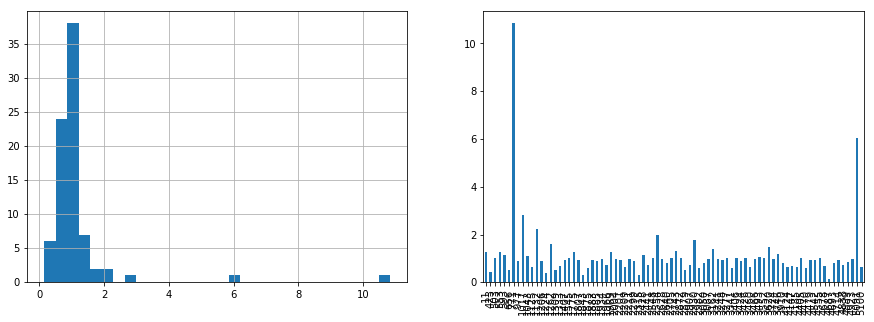

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(121)
df_ncd_policy_compare[df_ncd_policy_compare['Ratio']>0]['Ratio'].hist(bins = 30)
plt.subplot(122)
df_ncd_policy_compare[df_ncd_policy_compare['Ratio']>0]['Ratio'].plot.bar()

In [11]:
# sum Premium for these policy_number
df_policy_grouped = df_policy.groupby('Policy_Number').sum().reset_index()
print(df_policy_grouped.shape)
# df_policy_grouped[['Policy_Number', 'Premium']].head()
# merge premium and next 
df_policy_compare = df_policy_grouped[['Policy_Number','Premium']].merge(df_training, on = ['Policy_Number'], how = 'left')
print(df_policy_compare.shape)
# calc ratio
df_policy_compare['Ratio'] = df_policy_compare['Next_Premium']/df_policy_compare['Premium']
df_policy_compare.sample(10)

(351273, 23)
(351273, 3)


,Policy_Number,Premium,Next_Premium,Ratio
104629,4c35c554541ece4ab05f0bbede1547147bb7019d,7869,7289.0,0.926293
150251,6d436c0bbdb38aea4eb3d55362e226139b7a60de,40905,0.0,0.000000
145362,69baf84fc9d52d24eb26f80e83691a758dc2d738,4117,4170.0,1.012873
265567,c16f21ea8893cd6ecb2c62af4428186ec57173e2,2807,3093.0,1.101888
178158,81ade6fa812ca5a0feafe06886cca1bbc960433c,13196,10432.0,0.790543
170547,7c17ed31323d08b40be534e0104b599c874dc8a2,4870,9472.0,1.944969
3565,028c04a5a22f28ca9a0a9f2853f78015e65abe5f,7829,0.0,0.000000
57259,29afb82e910e20ca3e32ba4090dcc2031aff490b,1417,0.0,0.000000
164016,773e16375c1227ec3c95d366d7015e7746e87d4f,3342,NaN,NaN
29719,1592690672bc2b7d26e3c71e992aa6a1b30c669b,5882,NaN,NaN


/Users/ching/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


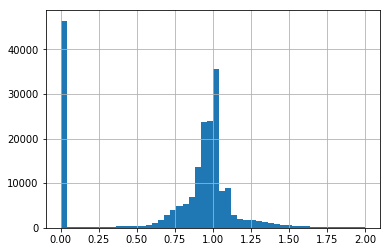

In [26]:
# plot ratio 
#plt.figure(figsize=(15,5))plot.subplot(121)
# df_policy_compare[['Ratio']].hist(bins = 1000)
df_policy_compare[df_policy_compare.Ratio < 2].Ratio.hist(bins = 50)
# df_policy_compare[df_policy_compare.Ratio < 2].Ratio.value_counts().sort_index()
#plt.subplot(122)
#df_policy_compare[['Ratio']].plot.bar()

In [49]:
df_claim_grouped = df_claim.groupby(['Policy_Number']).sum().reset_index()
cond1 = df_claim_grouped['Paid_Loss_Amount']==0
cond2 = df_claim_grouped['paid_Expenses_Amount']==0
cond3 = df_claim_grouped['Salvage_or_Subrogation?']==0
cond = cond1 & cond2 & cond3
df_temp = df_claim_grouped[cond][['Policy_Number','Paid_Loss_Amount','paid_Expenses_Amount', 'Salvage_or_Subrogation?', 'Nature_of_the_claim', 'At_Fault?', 'Driver\'s_Relationship_with_Insured']]

In [50]:
df_temp.sample(10)

,Policy_Number,Paid_Loss_Amount,paid_Expenses_Amount,Salvage_or_Subrogation?,Nature_of_the_claim,At_Fault?,Driver's_Relationship_with_Insured
21571,9a813e0dbab9d7a43eb1ee036d6ee82cbd68274b,0,0,0,1,0.0,3
5737,288f5823396d4d2478180dcb518139587a4aac24,0,0,0,1,0.0,1
338,0294b4179bd68e36701acead4ef1a0521bc4ce1a,0,0,0,2,140.0,10
20236,91526b259c1c0cc782b129c8d9d1921723cf0c66,0,0,0,1,0.0,2
20078,90142ca57154d1900614751ee08f90a8bd076d14,0,0,0,1,100.0,2
9126,4142fc8251a7ac336e7177092a238981c830675b,0,0,0,2,100.0,2
28653,cc1c301ad684ec3752423e5cc7cfb9daa0167656,0,0,0,1,0.0,1
8734,3e6960891ca35d256d41ab73d17a7456bd50b4cb,0,0,0,1,0.0,1
23174,a5b5653af6c283470ffbd5ccabdf48d7aa34decd,0,0,0,2,60.0,6
1409,0a242362f571e24096f9a427a36492a555c7fc98,0,0,0,1,30.0,1


In [51]:
df_temp = df_temp.merge(df_training, on = 'Policy_Number', how = 'left')
df_temp[df_temp['Next_Premium']==0].shape[0]/df_temp[df_temp['Next_Premium'].notnull()].shape[0]

0.23178807947019867

# Premium 簽單保費

In [ ]:
df_premium = df_policy['Premium']
plt.figure(figsize=(30,10))
plt.subplot(121)
df_premium[df_premium < 20000].hist(bins=1000)
plt.subplot(122)
df_premium[df_premium > 20000].hist(bins=1000)

In [ ]:
df_premium[df_premium < 2500].hist(bins=20)

In [ ]:
df_premium.describe()

# Replacement_cost_of_insured_vehicle 重置成本

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
df_policy[df_policy.Replacement_cost_of_insured_vehicle < 750].Replacement_cost_of_insured_vehicle.hist(bins=1000)
plt.subplot(122)
df_policy[df_policy.Replacement_cost_of_insured_vehicle >= 750].Replacement_cost_of_insured_vehicle.hist(bins=1000)

In [ ]:
df_policy[df_policy.Replacement_cost_of_insured_vehicle <= 100].Replacement_cost_of_insured_vehicle.hist(bins=100)

In [ ]:
df_policy.Replacement_cost_of_insured_vehicle.describe()

# Distribution_Channel 主通路代號

In [ ]:
df_Distribution_Channel = df_policy.Distribution_Channel.value_counts()
df_Distribution_Channel

In [ ]:
df_Distribution_Channel[df_Distribution_Channel > 2000].plot.bar()

In [ ]:
df_Distribution_Channel[df_Distribution_Channel < 2000]

# Multiple_Products_with_TmNewa_(Yes_or_No?) 同一車主前一年度非車險保單件數

In [ ]:
df_Multiple_Products_with_TmNewa = df_policy['Multiple_Products_with_TmNewa_(Yes_or_No?)']
df_Multiple_Products_with_TmNewa[(df_Multiple_Products_with_TmNewa >= 0) & (df_Multiple_Products_with_TmNewa < 5)].hist(bins=10)
df_Multiple_Products_with_TmNewa.describe()

In [ ]:
# proportions: (0, 0~5, 5~) = 0.89: 0.08: 0.02
df_Multiple_Products_with_TmNewa[df_Multiple_Products_with_TmNewa == 0].count() / df_Multiple_Products_with_TmNewa.count() # 0.89
df_Multiple_Products_with_TmNewa[(df_Multiple_Products_with_TmNewa > 0) & (df_Multiple_Products_with_TmNewa < 5)].count() / df_Multiple_Products_with_TmNewa.count() # 0.08
df_Multiple_Products_with_TmNewa[df_Multiple_Products_with_TmNewa >= 5].count() / df_Multiple_Products_with_TmNewa.count() # 0.02

# lia_class 車責本期級數

In [ ]:
df_policy['lia_class'].value_counts().sort_index().plot.bar()

# plia_acc 車責賠款係數

In [ ]:
df_policy['plia_acc'].value_counts().sort_index().plot.bar()

# pdmg_acc 車體賠款係數

In [ ]:
col = 'pdmg_acc'
# print('車責', sorted(set(df1[col])))
# print('竊盜', sorted(set(df2[col])))
# print('車損', sorted(set(df3[col])))
# 車責 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0]
# 竊盜 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 2.0, 4.0]
# 車損 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0]
# 竊盜 無 1.6
df_policy['pdmg_acc'].value_counts().sort_index().plot.bar()

## fassured 被保險人性質
1:國內自然人     1427579

2:國內法人        317771

3:國外自然人     2586

4:國外法人

5:自然人ID有誤 

6:法人ID有誤       6

In [ ]:
df_policy['fassured'].value_counts().plot(kind='bar')

## ibirth 出生日期,  dbirth 要保人出生日期

In [ ]:
# null count
# ibirth                              317765
# dbirth                            258932
driver = df_policy[['ibirth' , 'dbirth']]
condition1 = driver['ibirth'].isnull()    # 18.2 %
condition2 = driver['dbirth'].isnull()    # 14.8 %

condition3 = driver['ibirth'].notnull()   
condition4 = driver['dbirth'].notnull()   


driver_0N= driver[condition3&condition4]  # both have values  (81.5%)
driver_1N= driver[condition1^condition2]  # missing one (3.9%)
driver_2N= driver[condition1|condition2]  # missing both (18.4%)

# print(driver_0N.shape[0]/driver.shape[0])
# print(driver_1N.shape[0]/driver.shape[0]) 
# print(driver_2N.shape[0]/driver.shape[0])

In [ ]:
plt.figure(figsize=(15,5))
(2016 - driver_2N['ibirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y')).dt.year).value_counts().sort_index().plot(kind='bar')

In [ ]:
# ibirth != dbirth
indiff = driver_0N[driver_0N['ibirth'] != driver_0N['dbirth']]
print(indiff.count()) #75794

In [ ]:
# weired dates
# 可參考 Accident_Date：出險日期
# https://tbrain.trendmicro.com.tw/Discussion/Forum/4
### dbirth has some weird date
### check non-null data & sort

# print(driver['dbirth'].notnull().sum()) # 1489010

# a = df_policy[driver['dbirth'].notnull()]['dbirth']
# b = sorted(a, key=lambda x: datetime.datetime.strptime(x, '%m/%Y'), reverse = True)
# driver_0N.loc[:,'ibirth_date'] = driver_0N.loc[:,'ibirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y'))
# driver_0N.loc[:,'dbirth_date'] = driver_0N.loc[:,'dbirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y'))

In [ ]:
# len(driver_0N.loc[driver_0N['ibirth_date'] > datetime.datetime.now()]) # 0
# len(driver_0N.loc[driver_0N['dbirth_date'] > datetime.datetime.now()]) # 60

In [ ]:
driver_0N['dbirth_date'].max(), driver_0N['dbirth_date'].min()  # max: 2658/9/1, min: 1912/2/1

In [ ]:
# (2016 - df_policy['dbirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y')).dt.year).value_counts().sort_index().plot(kind='bar')
df_policy['ibirth']

# fsex 性別

In [ ]:
# 1:男 774390
# 2:女 655775
# 空白:法人 275832
# 空白＋ nan = 317777 ~= (ibirth == NAN)
# 4: NAN 41945
df_policy['fsex'] = df_policy['fsex'].fillna(4)
df_policy['fsex'].value_counts().plot.bar()
df_policy['fsex'].value_counts()

# fmarriage 婚姻狀況

In [ ]:
#1已婚 919849
#2未婚 510328
#空白: ? 275820 和性別＝法人 數目不完全對上！？
# 
#4:NAN 41945
df_policy['fmarriage'] = df_policy['fmarriage'].fillna(4)
df_policy['fmarriage'].value_counts().plot.bar()

# aassured_zip 郵遞區號

In [ ]:
df_aassured_zip = df_policy['aassured_zip'].value_counts()
print(df_aassured_zip.describe())
threshold = 1000
# zip code count > threshold
# (郵遞區號iindex數目比例, 筆數佔總比數比例)
df_aassured_zip[df_aassured_zip > threshold].count() / df_aassured_zip.count(), df_aassured_zip[df_aassured_zip > threshold].sum() / df_aassured_zip.sum() 

In [ ]:
df_aassured_zip[df_aassured_zip > 1000].plot.bar()

# iply_area 承保地區代號(分公司)

In [ ]:
df_policy['iply_area'].value_counts().plot.bar()

In [ ]:
# fequipment1 ~ fequipment9, nequipment9
# 配備-音響註記
# 配備-車箱註記
# 配備-冷凍機組註記
# 配備-車框、車斗註記
# 配備-昇降系統註記
# 配備-電動車電池註記
# 配備-其他
# 配備-其他說明: ['', '', '大包', '5合1影音', '伸尾', '原裝車含配備']
plt.figure(figsize=(15,5))
columns = [f'fequipment{i}' for i in range(1,7)] + ['fequipment9', 'nequipment9']
for i, column in enumerate(columns):
    plt.subplot(2,4,i+1)
    print(df_policy[column].value_counts())
    df_policy[column].value_counts().plot.bar()
# [i.replace(' ', '') for i in df_policy['nequipment9'].value_counts().index.values]

In [ ]:
## Summary: 
# '''
# 'Insured_Amount1'                             : all postive - >negative
# 'Insured_Amount2'                             : all postive - >negative
# 'Insured_Amount3'                             : all postive - >negative
# 'Coverage_Deductible_if_applied'              : -100000 ~ 10000 -> take abs(Positive)
# 'Premium'                                     : all postive - > remain
# 'Replacement_cost_of_insured_vehicle'         : 1 ~ 8915  -> negative
# 'lia_class'                                   : set {-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
#                                                 11, 12, 13, 14, 15, 16, 17, 18, 19} >10 only 0.16%
#                                                 convert to 1+ (x * 10%)

# 'plia_acc'                                   : set [-0.38, -0.35, -0.3, -0.2, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 
#                                                     1.2, 1.5, 1.8, 2.1, 2.4, 2.8, 3.2, 3.7, 4.2, 4.7]
#                                                convert to (1+x)%
                                               
# 'pdmg_acc'                                   : set {-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0}
#                                                  convert to (1+x)%                                            
                                                
# '''

# Claim File

(69613, 20)

Claim_Number	賠案號碼

Nature_of_the_claim	賠案性質

Policy_Number	保單號碼

Driver's_Gender	肇事駕駛性別

Driver's_Relationship_with_Insured	與被保險人關係

DOB_of_Driver	肇事駕駛出生日

Marital_Status_of_Driver	肇事駕駛婚姻

Accident_Date	出險日期

Cause_of_Loss	出險原因

Paid_Loss_Amount	已決賠款

paid_Expenses_Amount	已決費用

Salvage_or_Subrogation?	追償金額

Coverage	險種代號

Vehicle_identifier	車牌

At_Fault?	肇責比例

Claim_Status_(close,_open,_reopen_etc)	單一險種CLOSE

Deductible	自負額

Accident_area	出險地區

number_of_claimants	事故關係人人數

Accident_Time	出險時間

# check Claim NAN

In [ ]:
df_claim.isnull().sum()
# Vehicle_identifier: 298
# At_Fault?: 39

## Nature_of_the_claim 賠案性質

In [ ]:
# 1: 賠償 63389
# 2: 追償 6224
df_claim['Nature_of_the_claim'].value_counts().plot(kind='bar')

## Driver's_Gender 肇事駕駛性別

In [ ]:
# 1: 男 49698
# 2: 女 19915
df_claim['Driver\'s_Gender'].value_counts().plot(kind='bar')

# Driver's_Relationship_with_Insured 與被保險人關係
1:被保險人本人  30134
2:被保險人親友 15074
3:被保險人員工  8231
4:租用被保險車輛  78
5:其他,  10130
6:配偶, 4654
7:子女 1312

In [ ]:
df_claim['Driver\'s_Relationship_with_Insured'].value_counts().plot(kind='bar')

# DOB_of_Driver 肇事駕駛生日

In [ ]:
# 年紀分佈
plt.figure(figsize=(15,5))
(2016 - df_claim['DOB_of_Driver'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y')).dt.year).value_counts().sort_index().plot(kind='bar')

# Marital_Status_of_Driver 肇事駕駛婚姻
1: 已婚 52481
2: 未婚 17132

In [ ]:
df_claim['Marital_Status_of_Driver'].value_counts().plot(kind='bar')

##  Accident_Date 出險日期

In [ ]:
# 出險日期分佈 近<->遠
((datetime.datetime.now() - df_claim['Accident_Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m'))) / np.timedelta64(1, 'M')).value_counts().sort_index().plot(kind='bar')

In [ ]:
df_claim['Accident_Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m'))

## Cause_of_Loss 出險原因
17 kinds

In [ ]:
df_claim['Cause_of_Loss'].value_counts().plot(kind='bar')

# Paid_Loss_Amount 已決賠款

In [ ]:
plt.subplot(1,2,1)
# df_claim['Paid_Loss_Amount'].hist()
df_claim[df_claim['Paid_Loss_Amount'] < 10000]['Paid_Loss_Amount'].hist(bins=100)
plt.subplot(1,2,2)
df_claim[df_claim['Paid_Loss_Amount'] >= 1000000]['Paid_Loss_Amount'].hist()

In [ ]:
# log(x+1)
np.log(df_claim['Paid_Loss_Amount'] + 1).hist()

# paid_Expenses_Amount 已決費用

In [ ]:
df_claim['paid_Expenses_Amount'].describe()

In [ ]:
plt.subplot(121)
df_claim['paid_Expenses_Amount'].hist()
plt.subplot(122)
np.log(df_claim['paid_Expenses_Amount'] +1).hist() # log(x+1)

In [ ]:
# Salvage_or_Subrogation? 追償金額
plt.subplot(121)
df_claim['Salvage_or_Subrogation?'].hist()
plt.subplot(122)
np.log(df_claim['Salvage_or_Subrogation?'] +1).hist() # log(x+1)

In [ ]:
#已決賠款 已決費用 追償金額 
#關係？
df_claim[['Paid_Loss_Amount','paid_Expenses_Amount', 'Salvage_or_Subrogation?']].head()

# Coverage 險種代號

In [ ]:
df_claim['Coverage'].value_counts().plot(kind='bar')

# Vehicle_identifier 車牌

In [ ]:
# 車牌事故數 次數分佈
df_claim['Vehicle_identifier'].value_counts().value_counts().plot(kind='bar')

# At_Fault? 肇責比例

In [ ]:
# 肇事比例分佈
df_claim['At_Fault?'].value_counts().sort_index().plot(kind='bar')

# Claim_Status_(close,_open,_reopen_etc) 單一險種CLOSE
1.已經全部結案: 69604

0.尚未全部結案: 9

In [ ]:
df_claim['Claim_Status_(close,_open,_reopen_etc)'].value_counts()

# Deductible 自負額
0: 69163筆

In [ ]:
plt.subplot(1,3,1)
df_claim['Deductible'].hist(bins=100)
plt.subplot(1,3,2)
df_claim[df_claim['Deductible'] > 0]['Deductible'].hist(bins=100)
plt.subplot(1,3,3)
np.log(df_claim[df_claim['Deductible'] > 0]['Deductible']).hist(bins=100)

In [ ]:
df_claim[df_claim['Deductible'] < 100]['Deductible'].hist(bins=100)

In [ ]:
df_claim['Deductible'].describe()

# Accident_area 出險地區 分公司

In [ ]:
df_claim['Accident_area'].value_counts().plot(kind='bar')

# number_of_claimants 事故關係人人數

In [ ]:
plt.subplot(121)
df_claim['number_of_claimants'].value_counts().sort_index().plot(kind='bar') # value distribution
plt.subplot(122)
plt.plot(df_claim['number_of_claimants'].value_counts().sort_index().index.values) # y: raw number of claimants

# Accident_Time 出險時間

In [ ]:
plt.figure(figsize=(15,1))
df_claim['Accident_Time'].value_counts().sort_index().plot(kind='bar')